In [279]:
import numpy as np
import pandas as pd
import matplotlib as plt
import csv
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from scipy import stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, OrdinalEncoder, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#for code: 
#make different pipelines for each model, and add a new notebook for these (1 hour)
#fix MNB with the thing where it wont run negative values (1 hour)
#look up n_estimators and what they mean (15 mins)
#look up meaning of undersampler and oversampler for random forest (5 mins)
#look up hypertuning for KNN and run the hyperparam tuning (30 mins)   

#total is 2 hours, 45 mins 

In [280]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [281]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [282]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [283]:
mc = pd.read_csv('mc.csv')

In [284]:
mc.head()
mc.session.value_counts()

Afternoon    228621
Morning      187943
Evening      172637
Night        139967
Name: session, dtype: int64

In [286]:
mc.dtypes

Unnamed: 0             int64
CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
SUSP_AGE_GROUP        object
SUSP_SEX              object
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
VIC_AGE_GROUP         object
VIC_RACE              object
VIC_SEX               object
year                 float64
month                float64
session               object
session_to            object
diff                  object
diff_min             float64
dtype: object

In [287]:
mc.dropna(subset=['CMPLNT_FR_TM'], inplace = True)

In [288]:
mc.dropna(subset=['PATROL_BORO'], inplace = True)

In [289]:
from datetime import datetime

In [290]:
import sklearn

In [291]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [292]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [293]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 

In [294]:
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

# Label Encoding columns (need to do this for the target class too)

In [295]:
# make a column of Day of week 
mc['RPT_DT'] = pd.to_datetime(mc['RPT_DT'])

In [296]:
mc['reported_dow'] = mc['RPT_DT'].dt.dayofweek

In [297]:
target_transform = LabelEncoder()
mc['session'] = target_transform.fit_transform(mc['session'])
mc.iloc[:,10:]

,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_AGE_GROUP,...,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,session,session_to,diff,diff_min,reported_dow
0,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,WHITE HISPANIC,F,2018.0,6.0,1,Evening,0 days 00:01:00,1.0,6
1,388.0,"ROBBERY,RESIDENTIAL COMMON AREA",COMPLETED,FELONY,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,<18,WHITE HISPANIC,M,2018.0,11.0,0,Afternoon,0 days 00:10:00,10.0,6
2,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,<18,...,<18,WHITE HISPANIC,F,2018.0,5.0,0,Afternoon,0 days 03:00:00,180.0,0
3,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,18-24,...,65+,BLACK,M,2018.0,12.0,0,Afternoon,0 days 00:15:00,15.0,5
4,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,18-24,BLACK,F,2018.0,9.0,0,Afternoon,0 days 00:15:00,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729163,198.0,CRIMINAL CONTEMPT 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,25-44,WHITE,F,2018.0,10.0,2,Morning,0 days 00:53:00,53.0,3
729164,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,45-64,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:10:00,10.0,1
729165,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,INSIDE,RESIDENCE-HOUSE,N.Y. POLICE DEPT,0.0,25-44,...,45-64,WHITE,F,2018.0,5.0,2,Morning,0 days 00:55:00,55.0,1
729166,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,GAS STATION,N.Y. POLICE DEPT,0.0,18-24,...,45-64,BLACK HISPANIC,M,2018.0,1.0,0,Afternoon,0 days 00:08:00,8.0,2


In [298]:
mc.columns

Index(['Unnamed: 0', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD',
       'OFNS_DESC', 'PD_CD', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude',
       'Longitude', 'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'year', 'month', 'session', 'session_to', 'diff', 'diff_min',
       'reported_dow'],
      dtype='object')

In [299]:
mc.shape

(729160, 35)

In [300]:
columns_to_keep = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC' , 'LAW_CAT_CD', 'BORO_NM', 
                   'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX', 'Latitude', 'Longitude',
                  'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 
                  'month', 'session', 'session_to', 'diff', 'diff_min' , 'reported_dow']

categorical = ['ADDR_PCT_CD', 'KY_CD','OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 
                'LOC_OF_OCCUR_DESC', 'SUSP_AGE_GROUP', 'SUSP_SEX','PATROL_BORO', 'VIC_AGE_GROUP',
               'VIC_RACE', 'VIC_SEX', 'reported_dow', 'session_to']

numerical = ['year', 'month', 'session','diff_min']

In [301]:
#change sample size to see how the recall changes 

mcsample = mc.sample(100000)

In [302]:
#drop target from the dataset 
#only include columns that we want in the pipeline

X = mcsample[columns_to_keep]

y = mcsample['CRM_ATPT_CPTD_CD']

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [357]:
## baseline Model - K NeighborsClassifier #non-parametric model


numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



KNN_pipe = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsClassifier())])  #where to change the model
KNN_pipe

KNN_pipe.fit(X_train,y_train)
KNN_pipe.score(X_test, y_test)

0.9863030303030303

In [358]:
#fix the gridsearch for KNN

KNN_params = {'model__n_estimators': [50, 100, 200, 500] ,
             'model__min_samples_leaf': [1,3,5,7]}
KNN_cv = GridSearchCV(estimator = KNN_pipe, param_grid = KNN_params, cv = 5)
KNN_cv.fit(X_train, y_train)

ValueError: Invalid parameter 'min_samples_leaf' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

In [366]:
#log reg pipeline
#fix the log reg by finding out what it's called 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



logreg_pipe = Pipeline([('preprocess', ct),
                ('model1',logreg_pipe???What to call)]) #where to change the model
logreg_pipe

#KNN_pipe.fit(X_train,y_train)  #change to logreg 
#KNN_pipe.score(X_test, y_test)

NameError: name 'logreg_pipe' is not defined

In [305]:
# Random Forest Classifier with Random OverSampling 

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

#Random Forest - with oversampling 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe = Pipeline([('preprocess', ct),('ros', RandomOverSampler()),  #tuning the model
                      ('model',
                       RandomForestClassifier())])  #change the model
RF_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('ros', RandomOverSampler()),
                ('model', RandomForestClassifier())])

In [306]:
RF_pipe.fit(X_train,y_train)
RF_pipe.score(X_test, y_test)

0.9871515151515151

In [307]:
#classification metrics

predicted = RF_pipe.predict(X_test)
predicted 

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.67      0.07      0.12       439
   COMPLETED       0.99      1.00      0.99     32561

    accuracy                           0.99     33000
   macro avg       0.83      0.53      0.56     33000
weighted avg       0.98      0.99      0.98     33000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


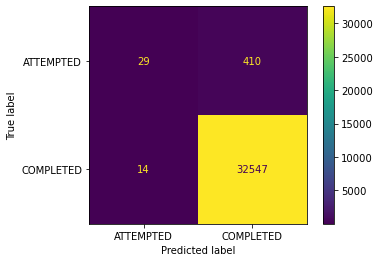

In [308]:
plot_confusion_matrix(RF_pipe, X_test, y_test)

In [343]:
# Random Forest Classifier with SMOTE 
# fix the SMOTE parens 

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])


ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])



RF_pipe_SMOTE = Pipeline([('preprocess', ct), ('model', SMOTE()
                       RandomForestClassifier())])  #where you change the model

RF_pipe_SMOTE

SyntaxError: invalid syntax (<ipython-input-343-b0fbb7d59520>, line 17)

In [337]:
RF_pipe_SMOTE.fit(X_train,y_train)
RF_pipe_SMOTE.score(X_test,y_test)

0.9873333333333333

In [338]:
predicted = RF_pipe_SMOTE.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

   ATTEMPTED       0.92      0.05      0.10       439
   COMPLETED       0.99      1.00      0.99     32561

    accuracy                           0.99     33000
   macro avg       0.95      0.53      0.55     33000
weighted avg       0.99      0.99      0.98     33000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


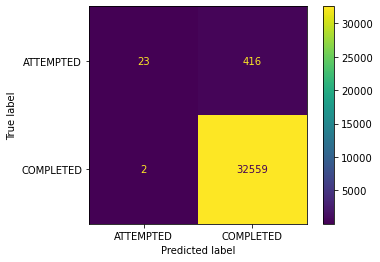

In [339]:
plot_confusion_matrix(RF_pipe_SMOTE, X_test, y_test)

In [340]:
RF_pipe_SMOTE

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('model', RandomForestClassifier())])

In [341]:
RF_pipe_SMOTE.named_steps['model']

RandomForestClassifier()

In [315]:
#tuning_pipe.get_feature_names()
#could use any pipeline

onehot_cols = RF_pipe_SMOTE.named_steps['preprocess'].named_transformers_['nominalpipe'].named_steps['onehotenc'].get_feature_names_out()

In [324]:
#feature names out 
#why are they all 0? 

feature_importances = (RF_pipe_SMOTE.steps[2][1].feature_importances_)
pd.DataFrame(list(zip(onehot_cols, feature_importances))).sort_values(by = 1, ascending = False)

,0,1
384,LAW_CAT_CD_FELONY,0.053758
164,"PD_DESC_ASSAULT 2,1,UNCLASSIFIED",0.032033
138,OFNS_DESC_HARRASSMENT 2,0.031200
385,LAW_CAT_CD_MISDEMEANOR,0.022941
119,KY_CD_578,0.022101
...,...,...
251,"PD_DESC_LARCENY,GRAND BY OPEN BANK ACCT",0.000000
107,KY_CD_345,0.000000
298,PD_DESC_MATERIAL OFFENSIV,0.000000
297,"PD_DESC_MARIJUANA, SALE 1, 2 & 3",0.000000


In [342]:
rf_params = {'model__n_estimators': [50, 100, 200, 500] ,
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = RF_pipe_SMOTE, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('onehotenc',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('onehotnorm',
                                                                                          MaxAbsScaler())]),
                                                                         ['ADDR_PCT_CD',
                                                                          'KY_CD',
                                                                          'OFNS_DESC',
                                                                          'PD_DESC',
                                                                          'LAW_CAT_CD',
                                                                          'BORO_NM',
                                                                          'LOC_OF_OCCUR_DESC',
                                                                          'SUSP_AGE_GROUP',
                                                                          'SUSP_SEX',
                                                                          'PATROL_BORO',
                                                                          'VIC_AGE_GROUP',
                                                                          'VIC_RACE',
                                                                          'VIC_SEX',
                                                                          'reported_dow',
                                                                          'session_to']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('numnorm',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'month',
                                                                          'session',
                                                                          'diff_min'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__min_samples_leaf': [1, 3, 5, 7],
                         'model__n_estimators': [50, 100, 200, 500]})

In [344]:
rf_cv.best_score_   #gives score on best estimation for these numbers 

0.9872537313432836

In [345]:
rf_cv.best_params_  #shows you the numbers that work best for the grid search 

{'model__min_samples_leaf': 1, 'model__n_estimators': 500}

In [346]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

#train the new pipeline on this param 

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('model', RandomForestClassifier(n_estimators=500))])

In [347]:
#fix by figuring out where to put recall

rf_params = {'model__n_estimators': [50, 100, 200, 500] ,
             'model__min_samples_leaf': [1,3,5,7]}
rf_cv = GridSearchCV(estimator = RF_pipe_SMOTE, param_grid = rf_params, cv = 5, metrics = recall)  #metrics = recall is different 
rf_cv.fit(X_train, y_train)

NameError: name 'recall' is not defined

In [326]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

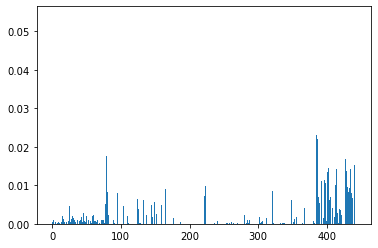

In [327]:
# plot feature importance
pyplot.bar([x for x in range(len(feature_importances))], feature_importances)
pyplot.show()

#Brendan 

In [ ]:
#models: 
#KNN 
#random forest 
#log reg
#support vector classifier 
#XG Boost 

#I need 4 models 

#confusion matrices 

In [317]:
# Multinomial Bayes with SMOTE

numeric_pipeline = Pipeline([('numnorm', StandardScaler())])

nominal_pipeline = Pipeline([
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')), 
    ('onehotnorm', MaxAbsScaler())])

ct = ColumnTransformer([
     ("nominalpipe", nominal_pipeline, categorical),
     ("numpipe", numeric_pipeline, numerical)])

MNB_pipe = Pipeline([('preprocess', ct),('smote' , SMOTE()),
                      ('model',
                       MultinomialNB())])  #where you change the model
MNB_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', MultinomialNB())])

In [350]:
from sklearn.preprocessing import MinMaxScaler

In [354]:
# transform data

#fix the min max scaler error to make it not have negative values

scaler.fit_transform(MNB_pipe)

TypeError: float() argument must be a string or a number, not 'ColumnTransformer'

In [355]:
MNB_pipe.fit(X_train,y_train)
MNB_pipe.score(X_test,y_test) 

ValueError: Negative values in data passed to MultinomialNB (input X)

In [319]:
plot_confusion_matrix(MNB_pipe, X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [320]:
predicted = MNB_pipe.predict(X_test)
predicted

#classification metrics 

print(classification_report(y_test, predicted))

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [332]:
# Grid Searching models 

# multi-nomial Naive Bayes 
# XGBboost (for Decision Tree)

# make lists of different parameters to check:

parameters = {
  'n_estimators':[1,10,100,1000],
  'min_samples_split': [2,3,4,5]
  }

# initialize
RF_pipe_SMOTE = GridSearchCV(RF_pipe_SMOTE,parameters)
# fit

RF_pipe_SMOTE.fit(X_train,y_train)
RF_pipe_SMOTE.best_params


ValueError: Invalid parameter 'min_samples_split' for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  ['ADDR_PCT_CD', 'KY_CD',
                                                   'OFNS_DESC', 'PD_DESC',
                                                   'LAW_CAT_CD', 'BORO_NM',
                                                   'LOC_OF_OCCUR_DESC',
                                                   'SUSP_AGE_GROUP', 'SUSP_SEX',
                                                   'PATROL_BORO',
                                                   'VIC_AGE_GROUP', 'VIC_RACE',
                                                   'VIC_SEX', 'reported_dow',
                                                   'session_to']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  ['year', 'month', 'session',
                                                   'diff_min'])])),
                ('smote', SMOTE()), ('model', RandomForestClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [333]:
RF_pipe_SMOTE.best_params

AttributeError: 'GridSearchCV' object has no attribute 'best_params'